<h4><b>Problem Statement:</b></h4>
<h5>
We aim to build a binary text classification model using Deep Neural Networks to classify movie reviews
into 'positive' or 'negative', based purely on the review text.
</h5>

<h4><b>Approach:</b></h4>
<h5>
- Load and understand the dataset<br/>
- Preprocess text data (cleaning, tokenization, padding)<br/>
- Build a deep neural network with an embedding layer<br/>
- Train and evaluate the model<br/>
- Test with custom reviews
</h5>

<h4><b>About the Dataset:</b></h4>
<h5>
The dataset is a CSV file with two columns:<br/>
- <b>review</b>: textual review of a movie<br/>
- <b>sentiment</b>: either 'positive' or 'negative'
</h5>

<h4><b>Data Loading</b></h4>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'IMDB Dataset.csv'

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<h4><b>Data Visualization:</b></h4>
<h5>
We check the distribution of sentiments and review lengths.
</h5>

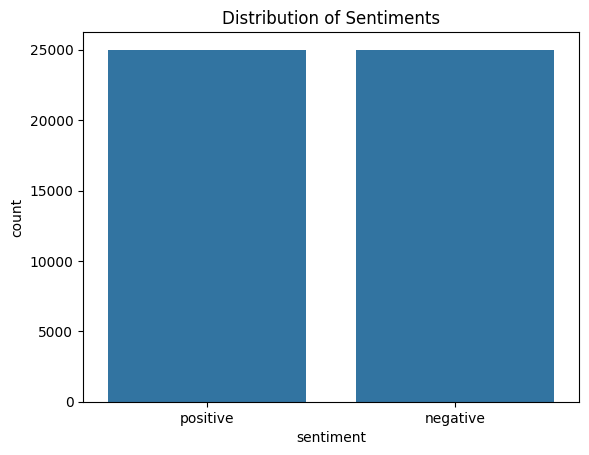

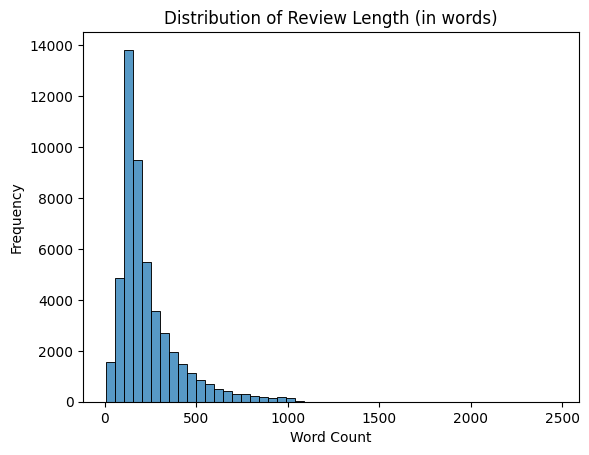

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment count plot
sns.countplot(data=df, x='sentiment')
plt.title("Distribution of Sentiments")
plt.show()

# Word count histogram
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Length (in words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


<h4><b>Data Preprocessing:</b></h4>
<h5>
We convert sentiments to binary, tokenize the text, and pad sequences to uniform length.
</h5>

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-04-24 14:20:07.368265: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-24 14:20:07.687438: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-24 14:20:07.801480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745504408.069201   19371 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745504408.175439   19371 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745504408.784214   19371 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [ ]:
# Convert labels to binary
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Tokenize and pad
vocab_size = 10000
max_length = 300
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

<h4><b>Model Building:</b></h4>
<h5>
We build a simple DNN model with an Embedding layer followed by Global Average Pooling and Dense layers.
</h5>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

<h4><b>Model Training & Evaluation:</b></h4>
<h5>
We train the model on training data and evaluate its performance on the validation set.
</h5>

In [ ]:
history = model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test), batch_size=32)

Epoch 1/10


2025-04-24 14:23:15.965323: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 48000000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6710 - loss: 0.5754 - val_accuracy: 0.8632 - val_loss: 0.3185
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8754 - loss: 0.2994 - val_accuracy: 0.8585 - val_loss: 0.3219
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8981 - loss: 0.2627 - val_accuracy: 0.8862 - val_loss: 0.2712
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9109 - loss: 0.2333 - val_accuracy: 0.8880 - val_loss: 0.2708
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9193 - loss: 0.2141 - val_accuracy: 0.8821 - val_loss: 0.2834
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9170 - loss: 0.2135 - val_accuracy: 0.8561 - val_loss: 0.3535
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9303 - loss: 0.1897 - val_accuracy: 0.8747 - val_loss: 0.3093
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9289 - loss: 0.1915 - val_accura

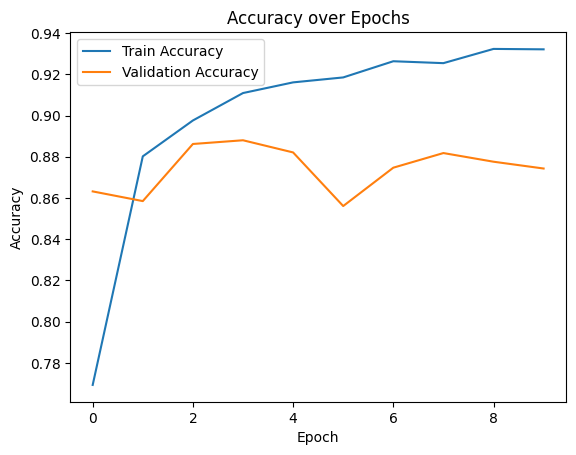

In [ ]:
# Plot accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5025 - loss: 0.6931
Test Loss: 0.693182647228241
Test Accuracy: 0.501800000667572


<h4><b>Confusion Matrix and ROC Curve Evaluation:</b></h4>
<h5>We will evaluate the model's performance using two important metrics: Confusion Matrix and ROC Curve.</h5>

 50/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


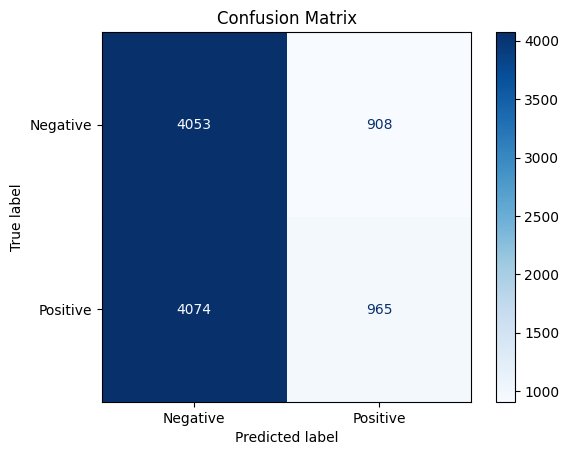

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

y_pred = model.predict(X_test_pad)
y_pred_class = (y_pred > 0.5).astype(int)  

cm = confusion_matrix(y_test, y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

<h4><b>ROC Curve</b></h4>
<h5>The ROC curve shows the tradeoff between the True Positive Rate (TPR) and the False Positive Rate (FPR). The area under the curve (AUC) provides a measure of the model's overall performance. A higher AUC indicates a better model.</h5>


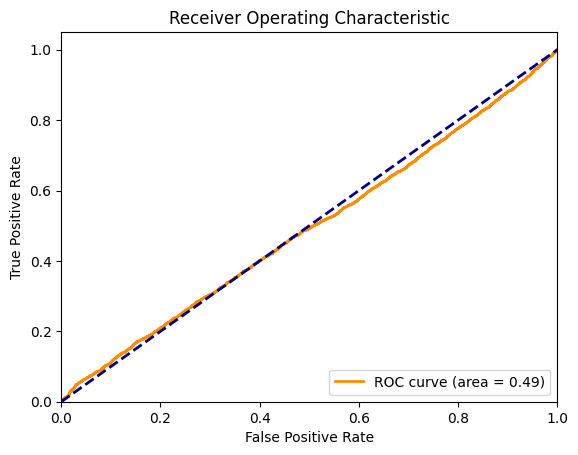

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


<h4><b>Testing with Example:</b></h4>
<h5>
We test the model on a custom movie review to predict its sentiment.
</h5>

In [ ]:
def predict_sentiment(review_text):
    seq = tokenizer.texts_to_sequences([review_text])
    pad = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
    pred = model.predict(pad)[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    return f"Predicted Sentiment: {sentiment} (Confidence: {pred:.2f})"

In [ ]:
print(predict_sentiment("The movie was dull and boring. I wouldn't recommend it."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Sentiment: Negative (Confidence: 0.42)


In [ ]:
print(predict_sentiment("The movie was awesome and enjoyable. I wouldn recommend it to all."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Sentiment: Positive (Confidence: 0.97)
